In [3]:
import keras
import numpy as np

Using TensorFlow backend.


In [4]:
from keras.applications import vgg16, inception_v3, resnet50, mobilenet

vgg_model = vgg16.VGG16(weights='imagenet')

inception_model = inception_v3.InceptionV3(weights='imagenet')

resnet_model = resnet50.ResNet50(weights='imagenet')

mobilenet_model = mobilenet.MobileNet(weights='imagenet')

In [5]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
!wget https://raw.githubusercontent.com/spmallick/learnopencv/master/Keras-ImageNet-Models/images/cat.jpg

--2019-02-05 22:17:17--  https://raw.githubusercontent.com/spmallick/learnopencv/master/Keras-ImageNet-Models/images/cat.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.248.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.248.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37971 (37K) [image/jpeg]
Saving to: ‘cat.jpg’

cat.jpg             100%[===================>]  37.08K  --.-KB/s    in 0s      

2019-02-05 22:17:17 (119 MB/s) - ‘cat.jpg’ saved [37971/37971]



In [6]:
filename = 'cat.jpg'

PIL image size (224, 224)


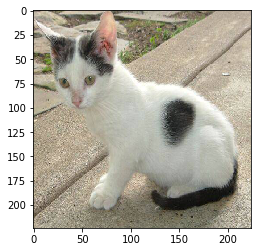

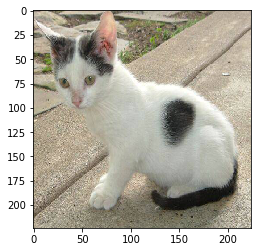

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


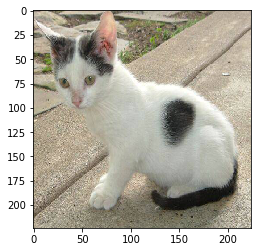

In [7]:
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()

# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)

# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [8]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# print predictions
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label_vgg = decode_predictions(predictions)
label_vgg


[[('n02123597', 'Siamese_cat', 0.3093409),
  ('n01877812', 'wallaby', 0.08034124),
  ('n02326432', 'hare', 0.07509851),
  ('n02325366', 'wood_rabbit', 0.05053067),
  ('n03223299', 'doormat', 0.048173655)]]

In [9]:
# prepare the image for the ResNet50 model
processed_image = resnet50.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = resnet_model.predict(processed_image)

# convert the probabilities to class labels
# If you want to see the top 3 predictions, specify it using the top argument
label_resnet = decode_predictions(predictions, top=3)
label_resnet

[[('n02124075', 'Egyptian_cat', 0.17055015),
  ('n02123597', 'Siamese_cat', 0.122457266),
  ('n03958227', 'plastic_bag', 0.11745568)]]

In [10]:

# prepare the image for the MobileNet model
processed_image = mobilenet.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = mobilenet_model.predict(processed_image)

# convert the probabilities to imagenet class labels
label_mobilenet = decode_predictions(predictions)
label_mobilenet

[[('n03958227', 'plastic_bag', 0.15703736),
  ('n02124075', 'Egyptian_cat', 0.11697448),
  ('n02123597', 'Siamese_cat', 0.10532669),
  ('n02123045', 'tabby', 0.07564867),
  ('n02909870', 'bucket', 0.054680947)]]

In [11]:
# load an image in PIL format
original = load_img(filename, target_size=(299, 299))

# Convert the PIL image into numpy array
numpy_image = img_to_array(original)

# reshape data in terms of batchsize
image_batch = np.expand_dims(numpy_image, axis=0)

# prepare the image for the Inception model
processed_image = inception_v3.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = inception_model.predict(processed_image)

# convert the probabilities to class labels
label_inception = decode_predictions(predictions)
label_inception

[[('n02124075', 'Egyptian_cat', 0.6622583),
  ('n02123045', 'tabby', 0.050285086),
  ('n02123597', 'Siamese_cat', 0.03638154),
  ('n02123159', 'tiger_cat', 0.023522405),
  ('n03223299', 'doormat', 0.015205706)]]

In [14]:
import cv2
numpy_image = np.uint8(img_to_array(original)).copy()
numpy_image = cv2.resize(numpy_image,(900,900))

cv2.putText(numpy_image, "VGG16: {}, {:.2f}".format(label_vgg[0][0][1], label_vgg[0][0][2]) , (350, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 3)
cv2.putText(numpy_image, "MobileNet: {}, {:.2f}".format(label_mobilenet[0][0][1], label_mobilenet[0][0][2]) , (350, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 3)
cv2.putText(numpy_image, "Inception: {}, {:.2f}".format(label_inception[0][0][1], label_inception[0][0][2]) , (350, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 3)
cv2.putText(numpy_image, "ResNet50: {}, {:.2f}".format(label_resnet[0][0][1], label_resnet[0][0][2]) , (350, 145), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 3)
numpy_image = cv2.resize(numpy_image, (700,700))
cv2.imwrite("images/{}_output.jpg".format(filename.split('/')[-1].split('.')[0]),cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR))

False

(-0.5, 699.5, 699.5, -0.5)

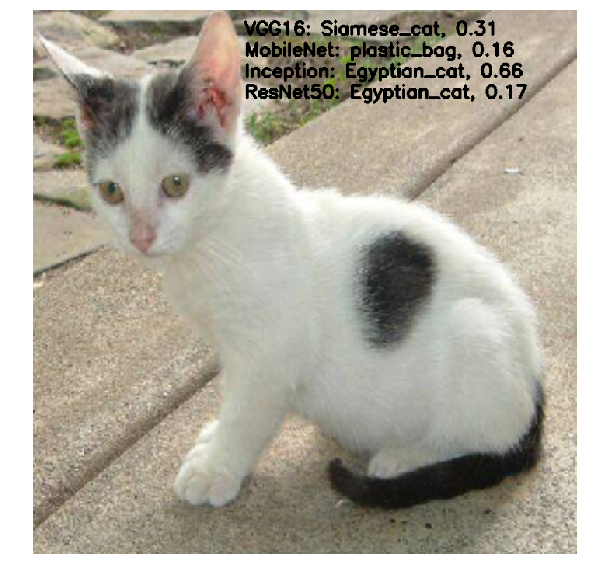

In [15]:
plt.figure(figsize=[10,10])
plt.imshow(numpy_image)
plt.axis('off')